In [2]:
#Importing Libraries
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline


In [3]:
#Generating Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

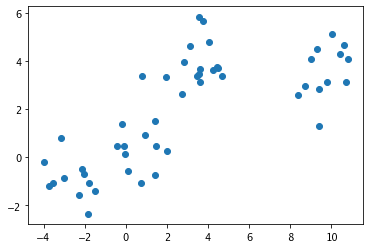

In [4]:
#Plot the scatter plot of the randomly generated data
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

In [5]:
#Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [6]:
#Fit the model with X2 and y2 from the generated data above
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

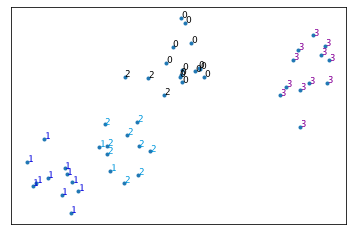

In [7]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [8]:
#Dendrogram
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.22911667 0.84397488 ... 0.24392853 0.57782849 0.81196096]
 [0.22911667 0.         0.96278002 ... 0.11922359 0.7557296  0.92367481]
 [0.84397488 0.96278002 0.         ... 0.86123048 0.35570532 0.04776856]
 ...
 [0.24392853 0.11922359 0.86123048 ... 0.         0.6838225  0.8203393 ]
 [0.57782849 0.7557296  0.35570532 ... 0.6838225  0.         0.35013094]
 [0.81196096 0.92367481 0.04776856 ... 0.8203393  0.35013094 0.        ]]


In [9]:
#Using the linkage class
Z = hierarchy.linkage(dist_matrix, 'complete')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


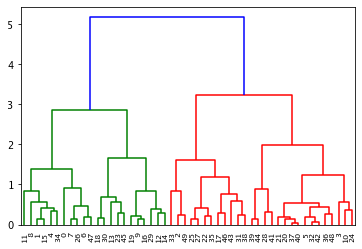

In [10]:
dendro = hierarchy.dendrogram(Z)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


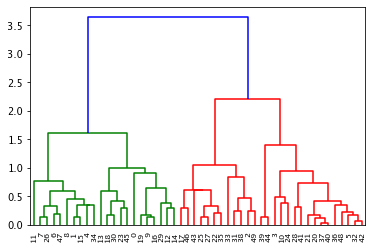

In [11]:
#We used complete linkage for our case
#Lets use average linkage to see how the dendogram changes
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)